# Weather Prediction

## Problem Statement
The objective of the dataset is to Predict whether conditions is :'drizzle', 'rain', 'sun', 'snow', 'fog' 

This is multiclass classification model to predict weather condition.


# Data Defining
Based on some factor we are, going to predict the weathers..

**Input Variables:**

1) **date:**Date is started from 01-01-2012 to 31-12-2015.	

2) **precipitation:**  All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle

3) **temp_max:**	Maximum temperature of a particular day.

4) **temp_min:**	Minimum temperature of a particular day.

5) **wind:** Wind speed	(Km/hr)

**Target Variable:**

6) **weather:** weathers types('drizzle', 'rain', 'sun', 'snow', 'fog')


<a id='import_packages'></a>
## 1. Import Packages

In [1]:
#Import the libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

import statsmodels
import statsmodels.api as sm

## 2. Set Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

<a id='Read_Data'></a>
## 3. Read the Data

In [3]:
df= pd.read_csv("seattle-weather.csv")
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
df.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


<a id='data_preparation'></a>
## 4. Understand and Prepare the Data

## 4.1 Data Types and Dimensions

In [5]:
df.shape

(1461, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

## 4.2 Stastical Summary

In [8]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
df.describe(include='object')

,date,weather
count,1461,1461
unique,1461,5
top,2012-01-01,rain
freq,1,641


## 4.3 Visualization

In [10]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [11]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

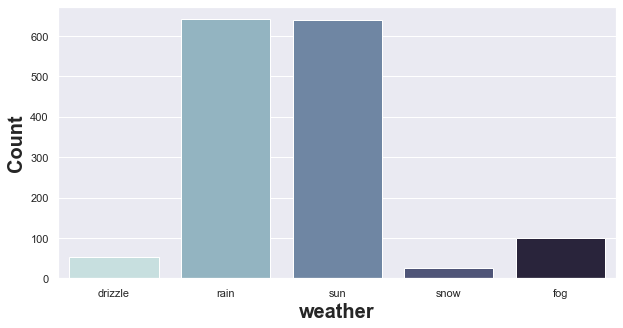

In [12]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = df,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=20)
plt.ylabel("Count",fontweight='bold',size=20)
plt.show()

## 4.4 Correlation Matrix

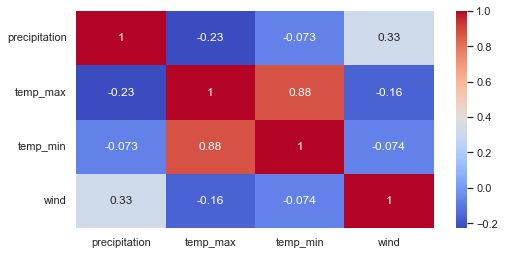

In [13]:
cor=df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

## 5. Prepare Data for Model Building 

In [14]:
df = df.drop('date',axis=1)

## 5.1 Dividing data into dependent and independent components

In [15]:
x = df.drop('weather',axis=1)
y = df['weather']
print(x.shape, y.shape)

(1461, 4) (1461,)


## 5.2 Apply SMOTE to Balance the Data

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

(3205, 4) (3205,)
Class=0, n=641 (20.000%)
Class=2, n=641 (20.000%)
Class=4, n=641 (20.000%)
Class=3, n=641 (20.000%)
Class=1, n=641 (20.000%)


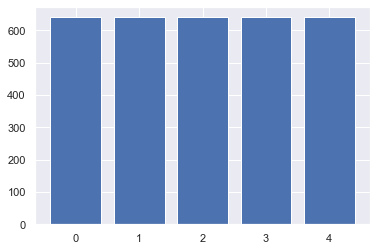

In [17]:
y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
print(x.shape, y.shape)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v/len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## 5.3 Spliting Data into train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

## 5.4 Shape of train and test set

In [19]:
print("*"*40)
print('\n')
print("Shape of x training data : ",X_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40, '\n')
print("Shape of x testing data : ",X_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************


Shape of x training data :  (2403, 4)
Shape of y training data :  (2403,)
**************************************** 

Shape of x testing data :  (802, 4)
Shape of y testing data :  (802,)
****************************************


## 5.5 Scale the Data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5.6 Defining Functions

## 1. Define Function for Classification Report

In [21]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

## 2.Define function for Kappa Score

In [22]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

## 3.Define function for Confusion Matrix in the form of Heat map

In [23]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    
    conf_matrix= pd.DataFrame(data= cm, columns= ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'],
                             index= ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
    sns.heatmap(conf_matrix, annot= True, fmt='d', cmap= ListedColormap(['lightskyblue']),
               cbar= False, linewidths=0.1, annot_kws={'size': 25})
    
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15, rotation=45)
    
    plt.show()

## 4.Define function for adding all Model for Comparision (Tabulate The Result)

In [24]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'),
                                    'Recall Score': metrics.recall_score(y_test, y_pred, pos_label='positive',average='micro'),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred, pos_label='positive', average='micro')}, 
                                    ignore_index = True)
    return(score_card)

# 6. Apply Classification Models

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GNB=classifier.fit(X_train, y_train)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
print(get_test_report(GNB))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46       157
           1       0.51      0.54      0.52       164
           2       0.98      0.78      0.87       162
           3       0.87      0.99      0.93       151
           4       0.48      0.62      0.54       168

    accuracy                           0.66       802
   macro avg       0.68      0.66      0.66       802
weighted avg       0.68      0.66      0.66       802



In [28]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.6596009975062345


In [29]:
kappa_score(GNB)

0.5740938508493962

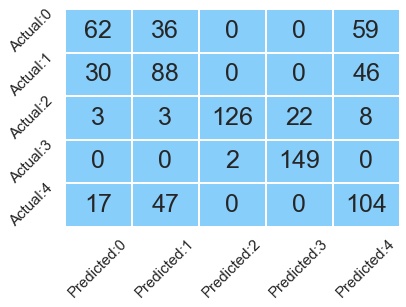

In [30]:
plot_confusion_matrix(GNB)